In [1]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

%matplotlib inline

In [2]:
def get_spectrum_data_and_wavelength(file):
    spec_data = pf.getdata(file)
    spec_header = pf.getheader(file)
    
    wl_i = spec_header['CRVAL1'] # Coordinate value of position in degrees, specified in CRPIX.
    wl_step = spec_header['CDELT1'] # Increment-per-pixel of axis n, in degrees
    wavelength = np.arange(spec_data.size)*wl_step+wl_i
    
    return spec_data, wavelength

In [3]:
def normalize_spectrum(spec_data, wavelength, step = 0.05):
    wl_max = wavelength.max()
    wl_min = wavelength.min()
    flx_max = spec_data.max()
    flx_min = spec_data.min()
    
    interpolation_function = interp.interp1d(wavelength, spec_data) # INTERPOLATE TO SAME WAVELENGTH GRID 
    
    new_wavelength = np.arange(wl_min, wl_max, step)
    new_flux = np.arange(flx_min, flx_max)
    new_flux = interpolation_function(new_wavelength)
    
    return new_wavelength, new_flux

In [192]:
def plot_spectrum(new_wavelength, new_flux, filename):
    title = filename.split('/')[-1].split('.')[0]
    
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.plot(new_wavelength, new_flux, '-')
    plt.xlabel(r"Wavelength")
    plt.ylabel(r"Flux")
    plt.title(title)
    plt.savefig('{}.png'.format(title),  bbox_inches='tight')
    plt.show()

In [193]:
def plot_normalized_spectrum(file):
    flux, wl = get_spectrum_data_and_wavelength(file)
#     new_wl, new_flux = normalize_spectrum(flux, wl)
#     print(new_flux)
    plot_spectrum(wl, flux, file)

# Trying to understand file structure

In [194]:
obs_X0319 = 'spectra/X0319/X0319_V_O_E.fits'
tel_X0319 = 'spectra/X0319/X0319_V_O_E_TRA.fits'
corrected_X0319 = 'spectra/X0319/X0319_V_O_E_TAC_final.fits'

In [195]:
obs_ftfile = pf.open(obs_X0319)

In [196]:
obs_ftfile.info()

Filename: spectra/X0319/X0319_V_O_E.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     530   (32423,)   float64   
  1  ERRS          1 ImageHDU        25   (32423,)   float64   


In [197]:
obs_ftfile[0].header

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                  -64 /bits per data value                             
NAXIS   =                    1 /number of axes                                  
NAXIS1  =                32423 /                                                
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2016-04-29T05:16:53' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
LAMNLIN =                 3727 / No. of lines used in wavelength solution       
LAMRMS  =  0.00558395155641321 / RMS of wavelength solution [CUNIT1]            
CRDER1  = 9.14664756893955E-05 / Wavelength uncertainty [CUNIT1]                
CSYER1  =                 0.02 / Typical systematic wavelength error [CUNIT1]   
CUNIT1  = 'nm      '        

In [198]:
obs_ftfile[0].data

array([228593.078125, 858789.625   , 909601.9375  , ..., 134238.5     ,
       133857.859375, 134520.09375 ])

In [199]:
len(obs_ftfile[0].data)

32423

In [200]:
obs_ftfile[1].header

XTENSION= 'IMAGE   '           / Written by IDL:  Mon Aug  1 05:02:57 2016      
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =                32423 /                                                
PCOUNT  =                    0 / number of random group parameters              
GCOUNT  =                    1 / number of random groups                        
DATE    = '2016-08-01'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
CRVAL1  =        533.670000000 /                                                
CDELT1  =      0.0150000000000 /                                                
CD1_1   =      0.0150000000000 /                                                
DC-FLAG =                   

In [201]:
obs_ftfile[1].shape

(32423,)

In [202]:
obs_ftfile[1].data

array([1.56750587e+06, 1.03980220e+06, 7.31170643e+05, ...,
       7.30458846e+02, 7.30864941e+02, 7.34419882e+02])

# Opening rest of spectra files

In [203]:
%ls spectra

ardata.fits  HD110379/  HD186791/  X0319/  X0386/  X0538/  X0771/


In [204]:
%ls spectra/X0319

X0319_N_O_E.fits            X0319_U_O_E.fits      X0319_V_O_E.fits
X0319_N_O_E_TAC_final.fits  X0319_U_O_E_TAC.fits  X0319_V_O_E_TAC_final.fits
X0319_N_O_E_TRA.fits        X0319_U_O_E_TRA.fits  X0319_V_O_E_TRA.fits


In [205]:
%ls spectra/X0386

X0386_N_N_E.fits            X0386_U_N_E.fits      X0386_V_N_E.fits
X0386_N_N_E_TAC_final.fits  X0386_U_N_E_TAC.fits  X0386_V_N_E_TAC_final.fits
X0386_N_N_E_TRA.fits        X0386_U_N_E_TRA.fits  X0386_V_N_E_TRA.fits


In [206]:
%ls spectra/X0538

X0538_N_N_E.fits            X0538_U_N_E.fits      X0538_V_N_E.fits
X0538_N_N_E_TAC_final.fits  X0538_U_N_E_TAC.fits  X0538_V_N_E_TAC_final.fits
X0538_N_N_E_TRA.fits        X0538_U_N_E_TRA.fits  X0538_V_N_E_TRA.fits


In [207]:
%ls spectra/X0771

X0771_N_N_E.fits            X0771_U_N_E.fits      X0771_V_N_E.fits
X0771_N_N_E_TAC_final.fits  X0771_U_N_E_TAC.fits  X0771_V_N_E_TAC_final.fits
X0771_N_N_E_TRA.fits        X0771_U_N_E_TRA.fits  X0771_V_N_E_TRA.fits


In [226]:
obs_X0319 = 'spectra/X0319/X0319_V_O_E.fits'
tel_X0319 = 'spectra/X0319/X0319_V_O_E_TRA.fits'
corrected_X0319 = 'spectra/X0319/X0319_V_O_E_TAC_final.fits'

In [243]:
obs_X0386 = 'spectra/X0386/X0386_N_N_E.fits'
tel_X0386 = 'spectra/X0386/X0386_N_N_E_TRA.fits'
corrected_X0386 = 'spectra/X0386/X0386_N_N_E_TAC_final.fits'

In [255]:
obs_X0538 = 'spectra/X0538/X0538_U_N_E.fits'
tel_X0538 = 'spectra/X0538/X0538_U_N_E_TRA.fits'
corrected_X0538 = 'spectra/X0538/X0538_U_N_E_TAC.fits'

In [267]:
obs_X0771 = 'spectra/X0771/X0771_U_N_E.fits'
tel_X0771 = 'spectra/X0771/X0771_U_N_E_TRA.fits'
corrected_X0771 = 'spectra/X0771/X0771_U_N_E_TAC.fits'

# Using previous functions on new data

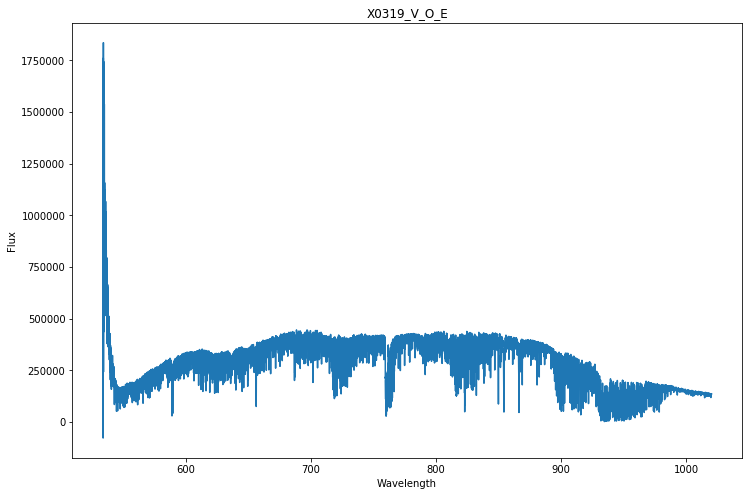

In [230]:
plot_normalized_spectrum(obs_X0319)

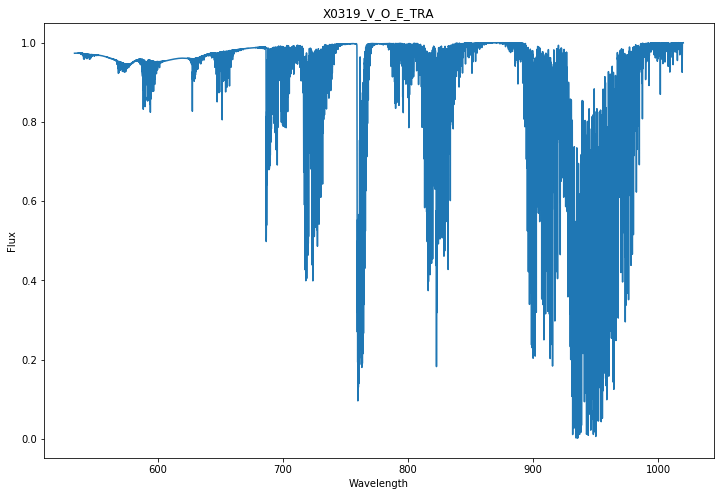

In [231]:
plot_normalized_spectrum(tel_X0319)

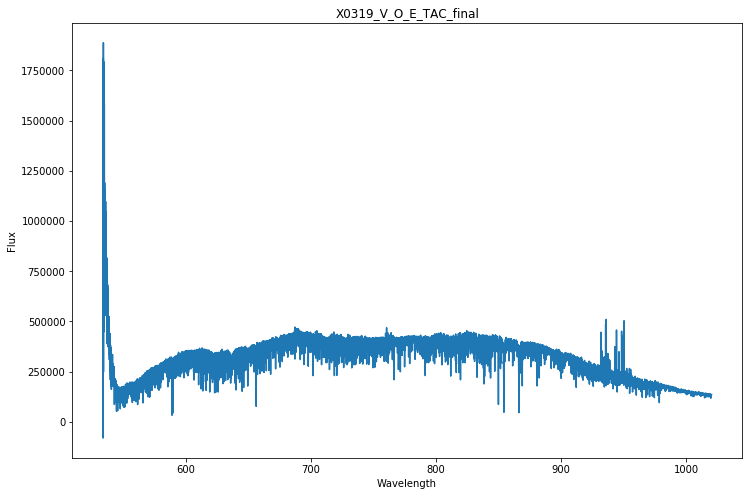

In [232]:
plot_normalized_spectrum(corrected_X0319)

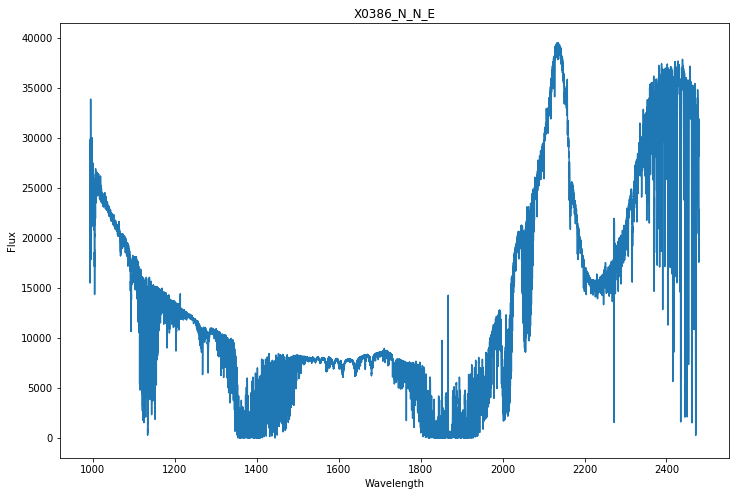

In [244]:
plot_normalized_spectrum(obs_X0386)

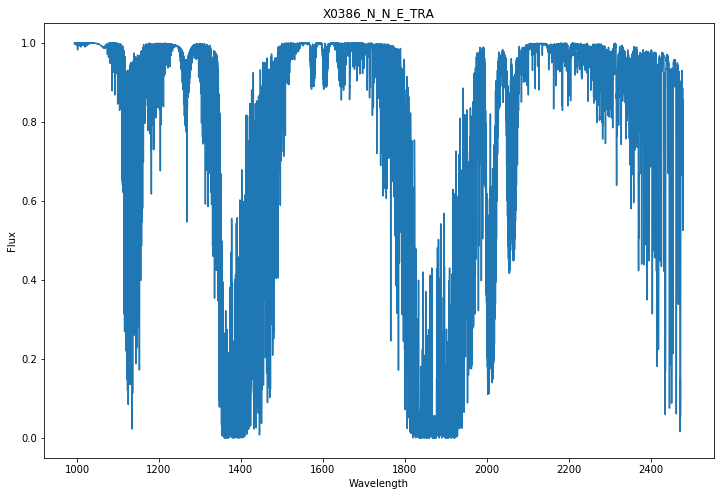

In [245]:
plot_normalized_spectrum(tel_X0386)

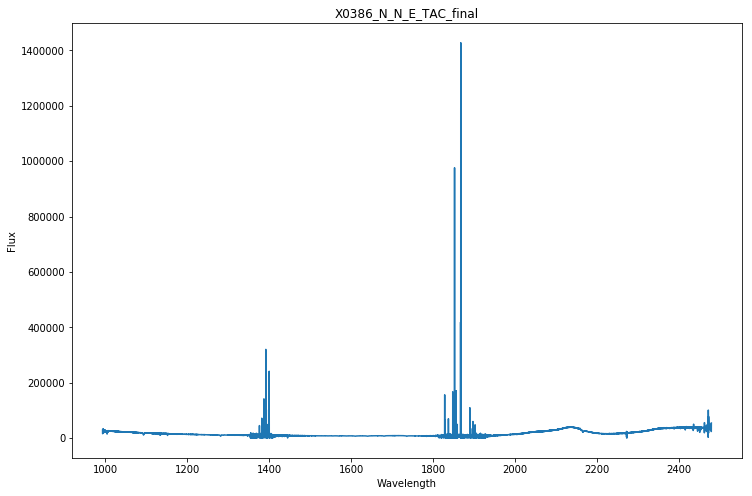

In [246]:
plot_normalized_spectrum(corrected_X0386)

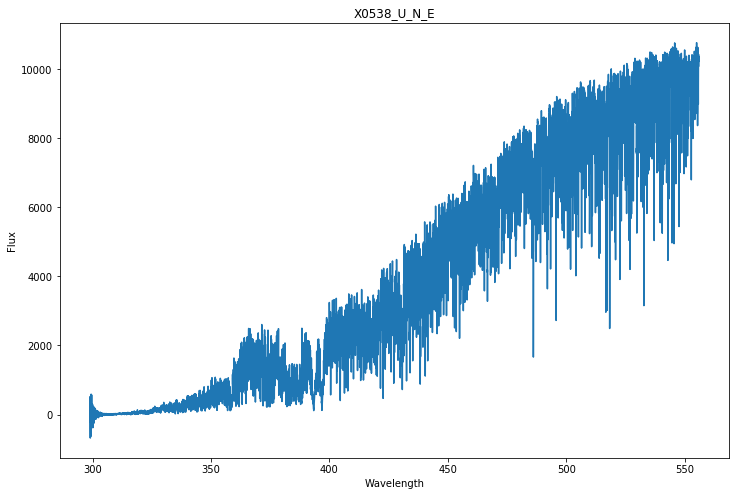

In [256]:
plot_normalized_spectrum(obs_X0538)

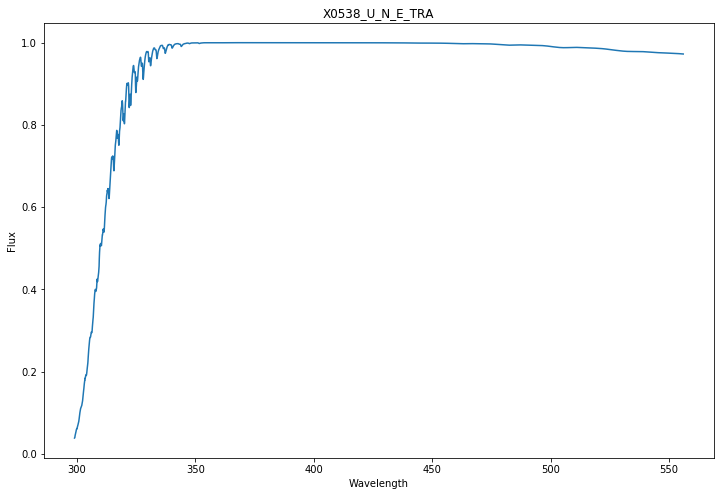

In [257]:
plot_normalized_spectrum(tel_X0538)

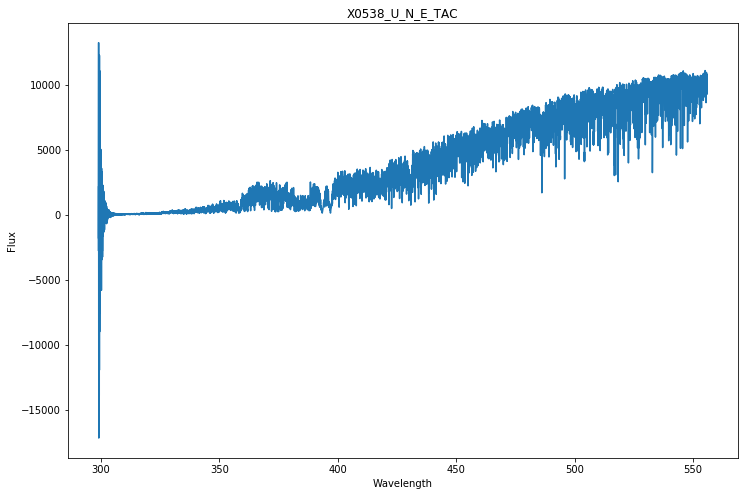

In [258]:
plot_normalized_spectrum(corrected_X0538)

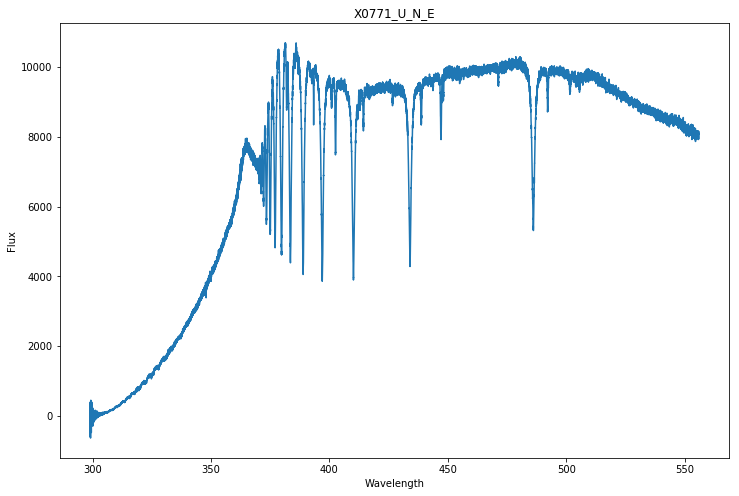

In [268]:
plot_normalized_spectrum(obs_X0771)

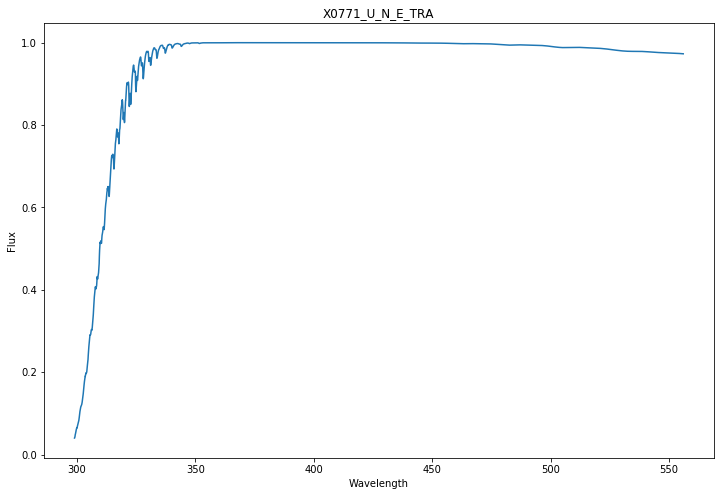

In [269]:
plot_normalized_spectrum(tel_X0771)

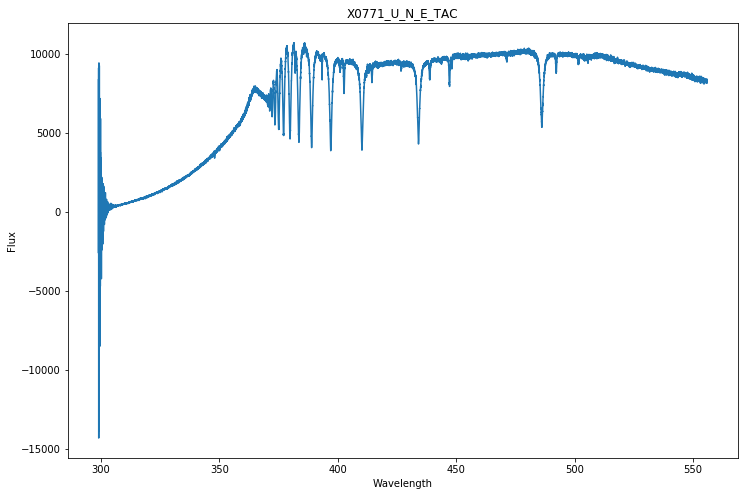

In [270]:
plot_normalized_spectrum(corrected_X0771)